In [297]:
import numpy as np
import os

# all files that start with early_exit_log
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.startswith("early_exit_log")]
# take only those with batch_4 (file example name early_exit_logits_10_batch_3_device_0.npy)
files = [f for f in files if f.split('_')[5] == '2']
files = sorted(files, key=lambda x: int(x.split('_')[3]))
x_final = []
for file in files:
    x = np.load(file)
    x_final.append(x)
    print(file, x)

early_exit_logits_55_batch_2_device_0.npy [4.53  4.266 3.787 3.762 3.65 ]
early_exit_logits_60_batch_2_device_0.npy [4.438 4.227 3.816 3.79  3.729]
early_exit_logits_65_batch_2_device_0.npy [4.445 4.246 3.824 3.793 3.7  ]
early_exit_logits_70_batch_2_device_0.npy [4.574 4.344 3.771 3.74  3.57 ]
early_exit_logits_75_batch_2_device_0.npy [4.43  4.273 3.828 3.828 3.645]
early_exit_logits_79_batch_2_device_0.npy [4.273 4.168 3.895 3.877 3.785]


In [298]:
x_final = np.vstack(x_final)

In [299]:
x_final

array([[4.53 , 4.266, 3.787, 3.762, 3.65 ],
       [4.438, 4.227, 3.816, 3.79 , 3.729],
       [4.445, 4.246, 3.824, 3.793, 3.7  ],
       [4.574, 4.344, 3.771, 3.74 , 3.57 ],
       [4.43 , 4.273, 3.828, 3.828, 3.645],
       [4.273, 4.168, 3.895, 3.877, 3.785]], dtype=float16)

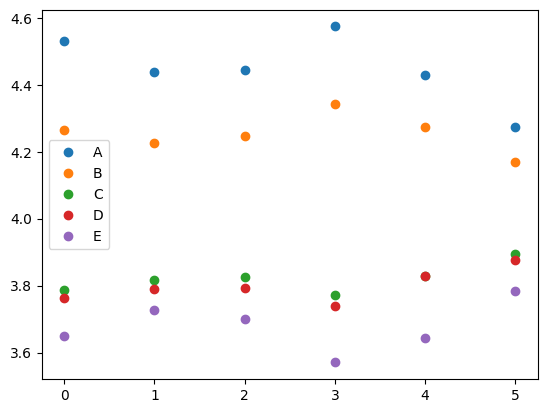

In [300]:
import matplotlib.pyplot as plt

plt.plot(x_final[:, 0], 'o', label='A')
plt.plot(x_final[:, 1], 'o', label='B')
plt.plot(x_final[:, 2], 'o', label='C')
plt.plot(x_final[:, 3], 'o', label='D')
plt.plot(x_final[:, 4], 'o', label='E')

plt.legend()

In [301]:
scores = np.load('platybus_scores.npy')
scores

array([[0.15319824, 0.27539062, 0.08831787, 0.16113281, 0.32177734],
       [0.23596191, 0.20739746, 0.22216797, 0.09777832, 0.2364502 ],
       [0.14526367, 0.16455078, 0.22192383, 0.22497559, 0.24316406],
       [0.11206055, 0.22705078, 0.16784668, 0.35717773, 0.13562012],
       [0.0559082 , 0.27294922, 0.29174805, 0.15014648, 0.22949219],
       [0.29052734, 0.02990723, 0.22180176, 0.2265625 , 0.23156738],
       [0.2770996 , 0.06109619, 0.27392578, 0.19787598, 0.19006348],
       [0.25170898, 0.21411133, 0.14880371, 0.07781982, 0.30737305],
       [0.13671875, 0.26464844, 0.26367188, 0.27026367, 0.06433105],
       [0.08050537, 0.40478516, 0.20227051, 0.10479736, 0.20751953],
       [0.24926758, 0.09136963, 0.11016846, 0.12249756, 0.42651367],
       [0.34301758, 0.28442383, 0.08526611, 0.05722046, 0.2298584 ],
       [0.18713379, 0.        , 0.        , 0.13061523, 0.6821289 ],
       [0.04812622, 0.32641602, 0.23425293, 0.11230469, 0.2788086 ],
       [0.05944824, 0.0357666 , 0.

In [302]:
options = 'ABCDE'
options_to_index = {options[i]: i for i in range(len(options))}
scores_best = np.argmax(scores, axis=1)
predictions = np.array([options[i] for i in scores_best])
predictions

array(['E', 'E', 'E', 'D', 'C', 'A', 'A', 'E', 'D', 'B', 'E', 'A', 'E',
       'B', 'D', 'C', 'A', 'E', 'A', 'C', 'D', 'E', 'C', 'C', 'E', 'D',
       'C', 'D', 'B', 'B'], dtype='<U1')

In [303]:
predictions[15]

'C'

In [308]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([1])
sigmoid(x)

array([0.73105858])

In [304]:
import pandas as pd

df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/work_dirs/160k-viktor-and-deotte-dataset-deotte-preproc-deberta-window-inference/test_with_context.csv", index_col="id")[:30]

df['answer'].values

array(['D', 'D', 'A', 'B', 'A', 'B', 'B', 'A', 'E', 'A', 'B', 'D', 'D',
       'D', 'A', 'D', 'D', 'C', 'A', 'B', 'A', 'D', 'D', 'A', 'B', 'C',
       'C', 'D', 'E', 'D'], dtype=object)

In [305]:
df['answer'].values[15]

'D'

In [281]:
np.average(df['answer'].values == predictions)

0.1

In [282]:
x = x / np.sum(x) * 20

In [283]:
x

array([3.973, 3.887, 4.15 , 3.975, 4.016], dtype=float16)

In [284]:
np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

array([0.1938, 0.178 , 0.2312, 0.1942, 0.2024], dtype=float16)

In [285]:
import numpy as np

np.load("suffix_np_522994.npy").shape

FileNotFoundError: [Errno 2] No such file or directory: 'suffix_np_522994.npy'